### Advance House Price Predicton - Data Analysis

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# to access all the features(columns)
pd.pandas.set_option('display.max_columns',None)

In [37]:
%matplotlib inline

Variables - 
1. dataset
2. cols_with_null

In [2]:
dataset = pd.read_csv('train.csv')
print("Shape of the dataset", dataset.shape)

Shape of the dataset (1460, 81)


In [3]:
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Missing Values

In [8]:
cols_with_null = [feature for feature in dataset.columns if (dataset[feature].isnull().sum() >1)]
print('number of columns with null values :', len(cols_with_null))

number of columns with null values : 18


In [9]:
for feature in cols_with_null:
    print('{} feature has {} null values'.format(feature,dataset[feature].isnull().sum()))

LotFrontage feature has 259 null values
Alley feature has 1369 null values
MasVnrType feature has 8 null values
MasVnrArea feature has 8 null values
BsmtQual feature has 37 null values
BsmtCond feature has 37 null values
BsmtExposure feature has 38 null values
BsmtFinType1 feature has 37 null values
BsmtFinType2 feature has 38 null values
FireplaceQu feature has 690 null values
GarageType feature has 81 null values
GarageYrBlt feature has 81 null values
GarageFinish feature has 81 null values
GarageQual feature has 81 null values
GarageCond feature has 81 null values
PoolQC feature has 1453 null values
Fence feature has 1179 null values
MiscFeature feature has 1406 null values


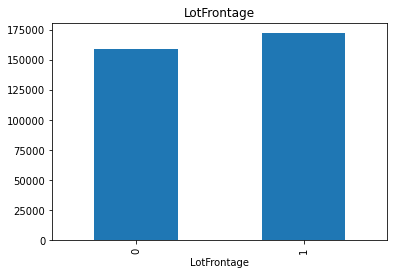

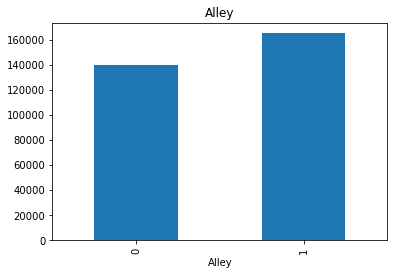

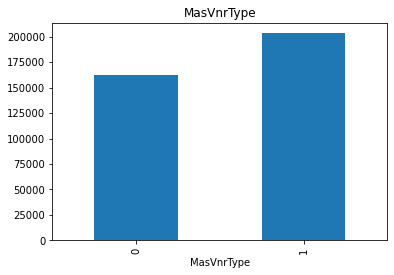

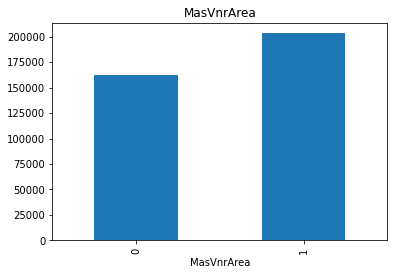

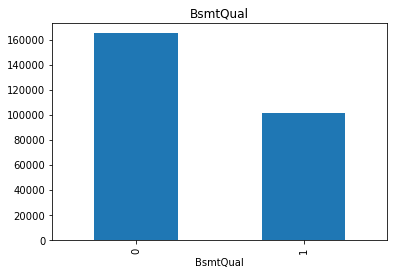

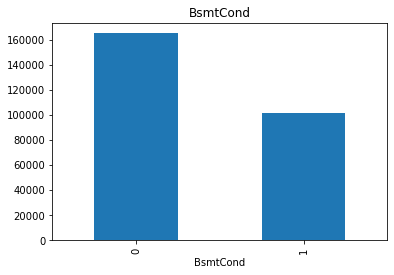

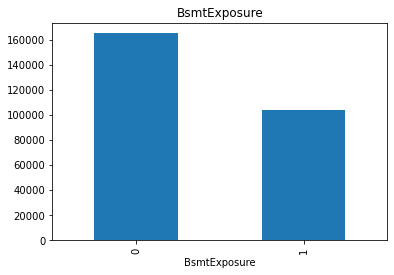

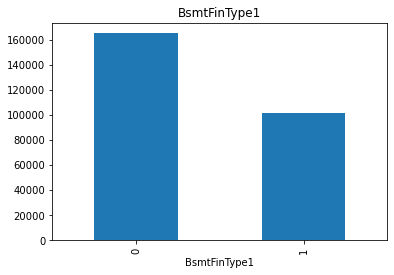

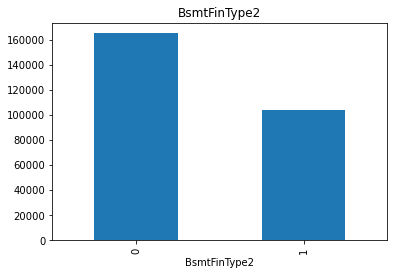

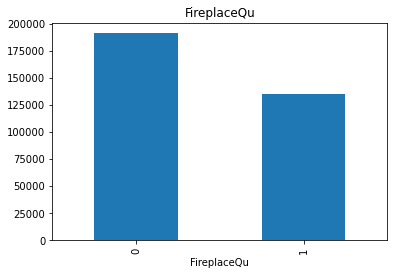

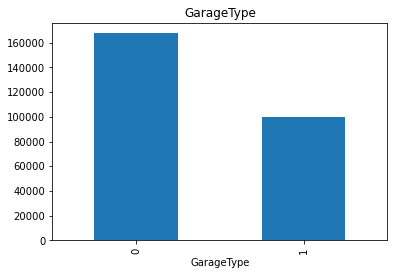

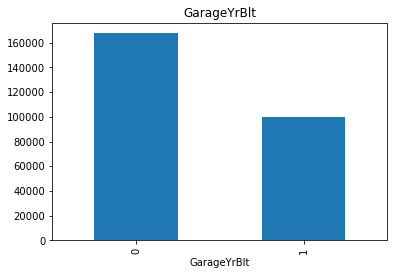

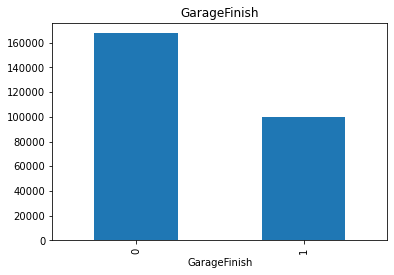

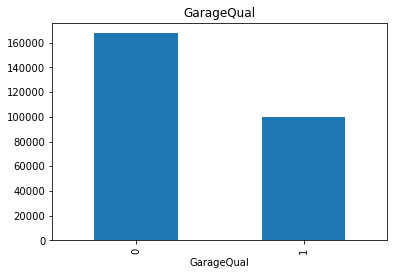

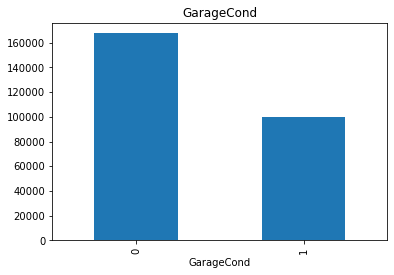

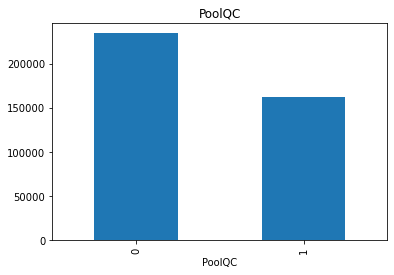

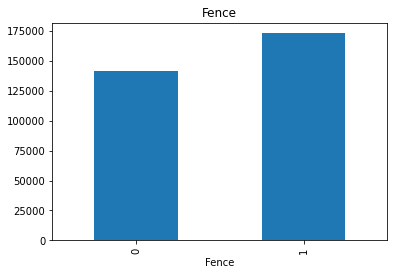

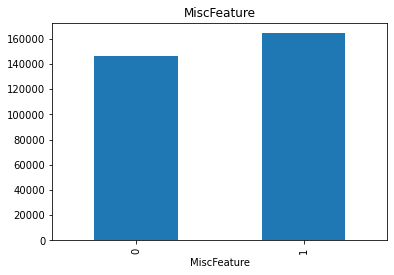

In [12]:
# now let's check relation of features with null values
# with respect to target variable (SalePrice)
for feature in cols_with_null:
    data = dataset.copy()
    
    # let's first replace null value with 1 and otherwise 0
    data[feature] = np.where(data[feature].isnull(), 1, 0)
    
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.title(feature)
    plt.show()

We can see here that there is a significant relationship between columns with null values and target variable. So, we need to replace null values with something significant. 

In [13]:
len(dataset['Id'].unique())

1460

Here we see that column Id has 1460 unique values so we can drop this column later.

### NUMERICAL VALUES

In [15]:
### let's check how many features have numerical values
num_features = [feature for feature in dataset.columns if dataset[feature].dtypes!='O']

print("Number of numerical features : ", len(num_features))

dataset[num_features].head()

Number of numerical features :  38


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000


### Temporal Numerical Variables eg. date-time

In [16]:
# we can see that in above dataset we have features with value of years. 
year_features = [feature for feature in num_features if 'Yr' in feature or 'Year' in feature]

print(year_features)

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']


In [18]:
# let's explore these variables
for feature in year_features:
    print(feature, dataset[feature].unique())

YearBuilt [2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 1983 1975 1997 1934 1963 1981 1964 1999 1972
 1921 1945 1982 1998 1956 1948 1910 1995 1991 2009 1950 1961 1977 1985
 1979 1885 1919 1990 1969 1935 1988 1971 1952 1936 1923 1924 1984 1926
 1940 1941 1987 1986 2008 1908 1892 1916 1932 1918 1912 1947 1925 1900
 1980 1989 1992 1949 1880 1928 1978 1922 1996 2010 1946 1913 1937 1942
 1938 1974 1893 1914 1906 1890 1898 1904 1882 1875 1911 1917 1872 1905]
YearRemodAdd [2003 1976 2002 1970 2000 1995 2005 1973 1950 1965 2006 1962 2007 1960
 2001 1967 2004 2008 1997 1959 1990 1955 1983 1980 1966 1963 1987 1964
 1972 1996 1998 1989 1953 1956 1968 1981 1992 2009 1982 1961 1993 1999
 1985 1979 1977 1969 1958 1991 1971 1952 1975 2010 1984 1986 1994 1988
 1954 1957 1951 1978 1974]
GarageYrBlt [2003. 1976. 2001. 1998. 2000. 1993. 2004. 1973. 1931. 1939. 1965. 2005.
 1962. 2006.

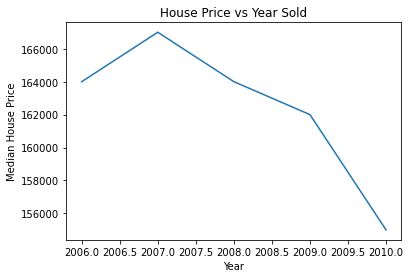

In [21]:
# let's check the relation between year_features and target variable
dataset.groupby("YrSold")['SalePrice'].median().plot()
plt.xlabel('Year')
plt.ylabel('Median House Price')
plt.title('House Price vs Year Sold')
plt.show()

usually sale price must increase by year but here it is decreasing, so we need to analyze other year feature w.r.t. Sale Price

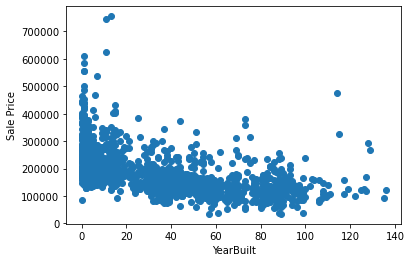

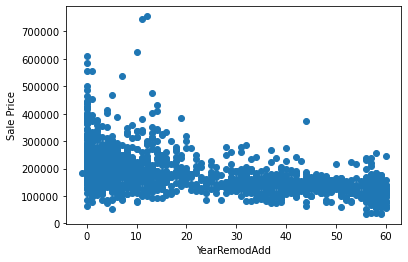

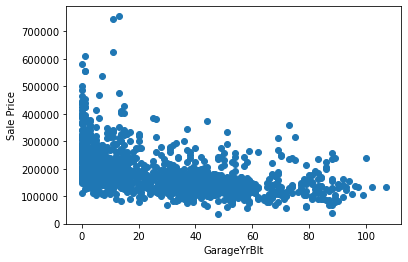

In [25]:
# let's check relation between other year features and Sale Price
for feature in year_features:
    if feature != 'YrSold':
        data = dataset.copy()
        data[feature] = data['YrSold']-data[feature]
        
        plt.scatter(data[feature], data['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('Sale Price')
        plt.show()

Here we can clearly see, that as the number of years increases from the year sold, the price decreases, which means older houses have lower selling prices.

In [42]:
# Numerical variables are of two types
# Let's check whether particular variable is discrete or continuous

### Discrete Variables

In [28]:
discrete_features = [feature for feature in num_features if len(dataset[feature].unique())<25 and feature not in year_features+['Id']]
print('Number of Discrete Features :', len(discrete_features))

Number of Discrete Features : 17


In [29]:
discrete_features

['MSSubClass',
 'OverallQual',
 'OverallCond',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 '3SsnPorch',
 'PoolArea',
 'MiscVal',
 'MoSold']

In [30]:
dataset[discrete_features]

,MSSubClass,OverallQual,OverallCond,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,3SsnPorch,PoolArea,MiscVal,MoSold
0,60,7,5,0,1,0,2,1,3,1,8,0,2,0,0,0,2
1,20,6,8,0,0,1,2,0,3,1,6,1,2,0,0,0,5
2,60,7,5,0,1,0,2,1,3,1,6,1,2,0,0,0,9
3,70,7,5,0,1,0,1,0,3,1,7,1,3,0,0,0,2
4,60,8,5,0,1,0,2,1,4,1,9,1,3,0,0,0,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,6,5,0,0,0,2,1,3,1,7,1,2,0,0,0,8
1456,20,6,6,0,1,0,2,0,3,1,7,2,2,0,0,0,2
1457,70,7,9,0,0,0,2,0,4,1,9,2,1,0,0,2500,5
1458,20,5,6,0,1,0,1,0,2,1,5,0,1,0,0,0,4


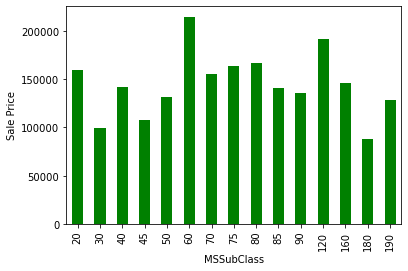

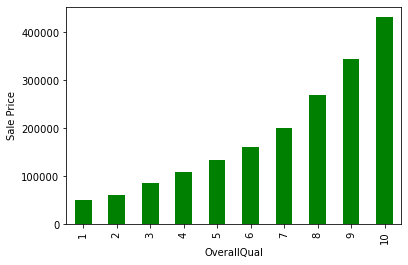

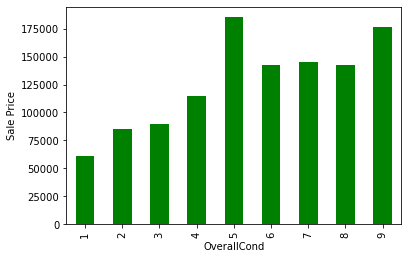

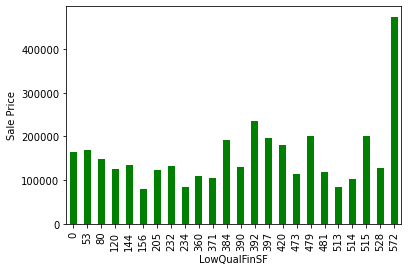

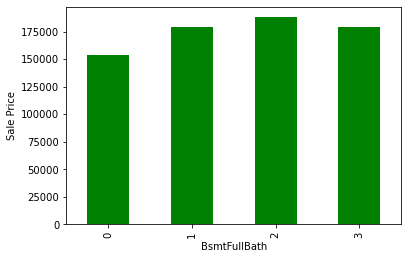

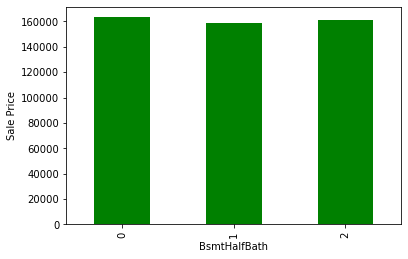

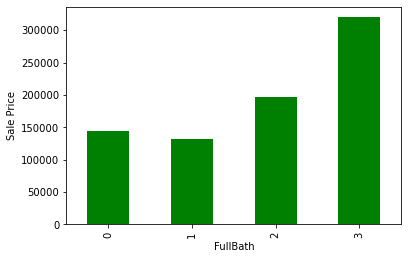

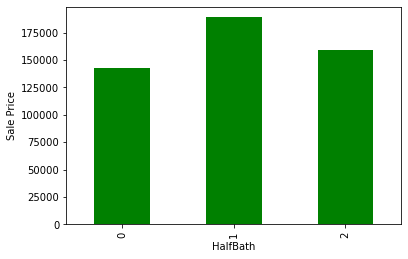

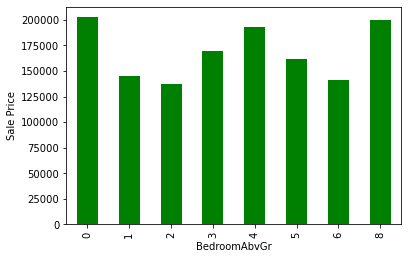

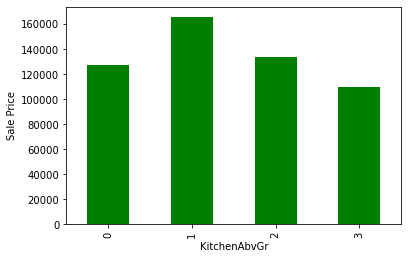

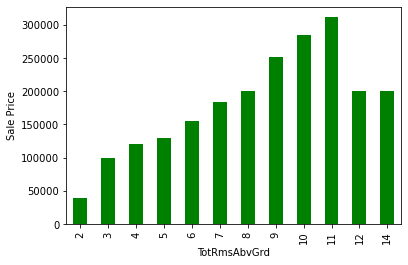

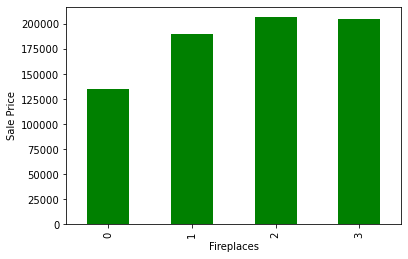

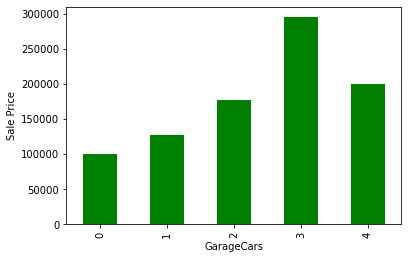

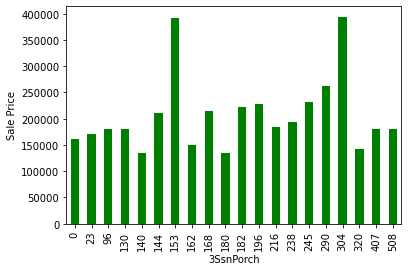

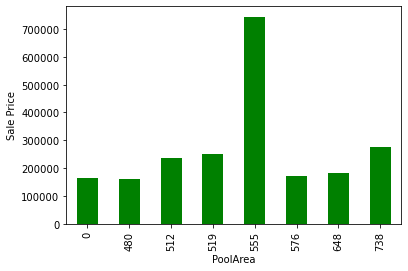

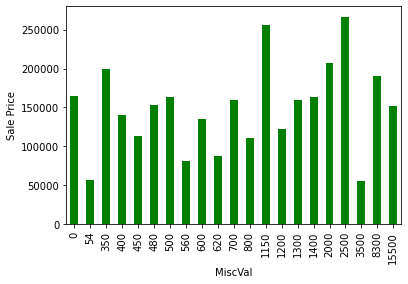

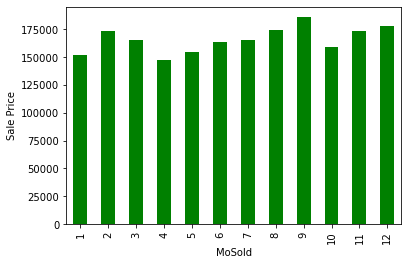

In [41]:
# now, let's analyze their relation with Sale Price
for feature in discrete_features:
    data = dataset.copy()
    
    data.groupby(feature)['SalePrice'].median().plot.bar(color='green')
    plt.xlabel(feature)
    plt.ylabel('Sale Price')
    plt.show()
    

Discrete variables have significant relationship with Sale price

### Continuous Variables

In [43]:
continuous_features = [feature for feature in num_features if feature not in discrete_features+year_features+['Id']]
print("Number of Continuous Features :", len(continuous_features))

Number of Continuous Features : 16


In [44]:
continuous_features

['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch',
 'SalePrice']

In [45]:
# let's check their relation with target variable
# for discrete we use barplot
# for continuous features we use histogram

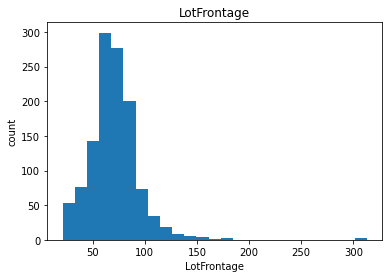

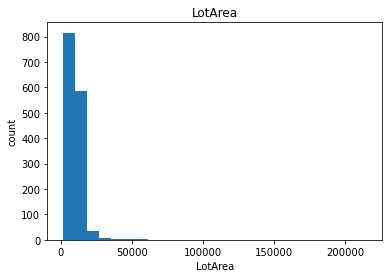

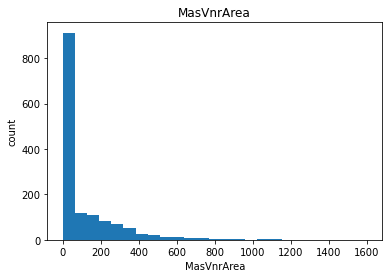

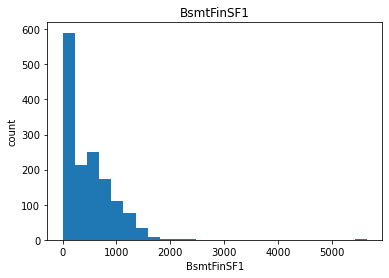

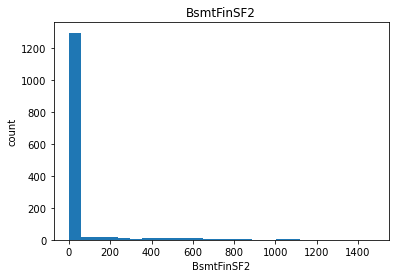

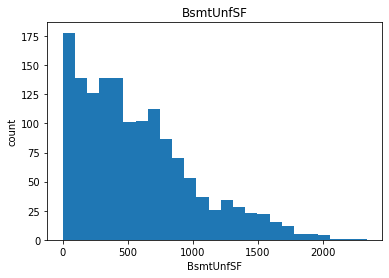

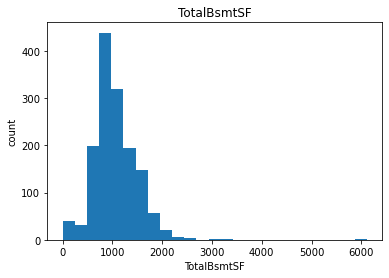

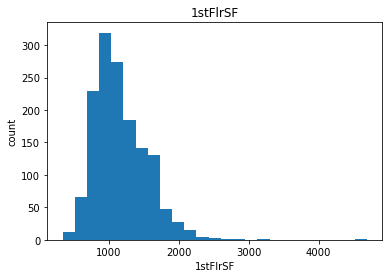

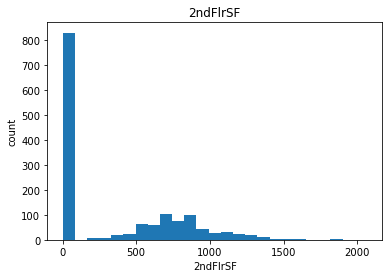

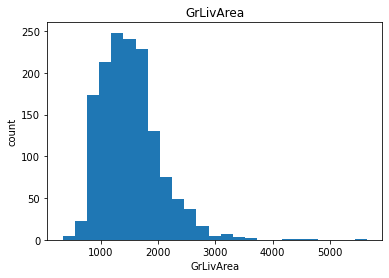

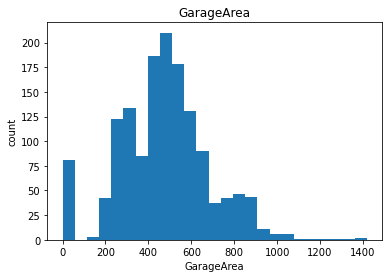

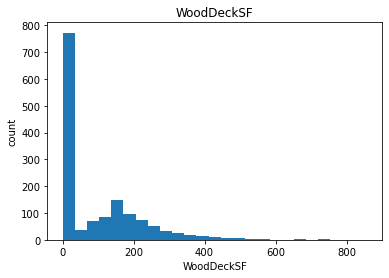

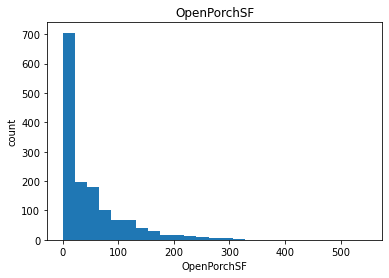

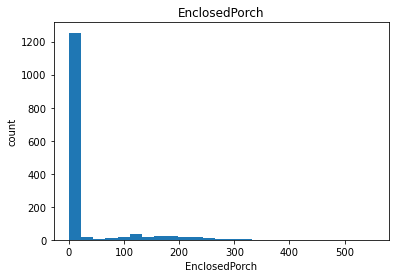

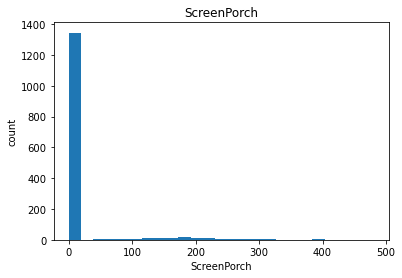

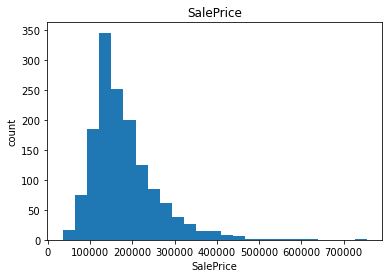

In [49]:
for feature in continuous_features:
    data = dataset.copy()
    data[feature].plot.hist(bins=25)
    
    plt.xlabel(feature)
    plt.ylabel('count')
    plt.title(feature)
    plt.show()

Here we see some of the features don't have Gaussian Distribution, i.e. they are skewed

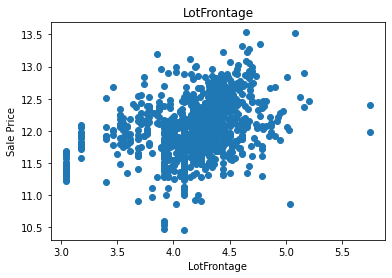

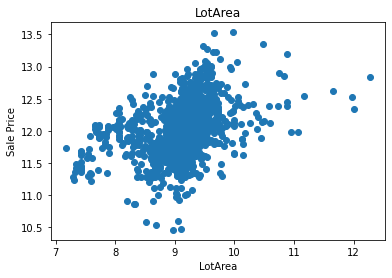

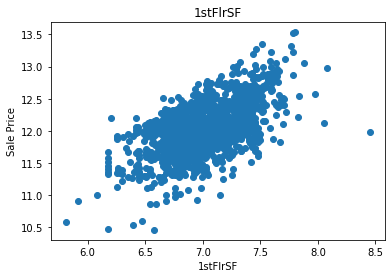

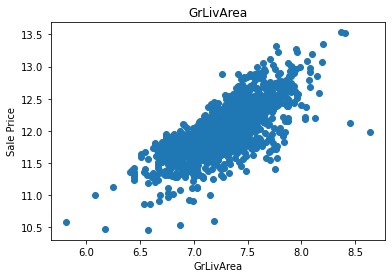

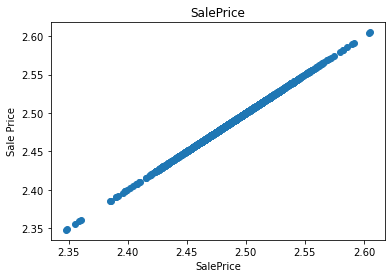

In [52]:
# we will use logarithmic transformation
for feature in continuous_features:
    data = dataset.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data['SalePrice']=np.log(data['SalePrice'])
        plt.scatter(data[feature], data['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('Sale Price')
        plt.title(feature)
        plt.show()

Now we can see, that for all these features, as Value of feature increases, Sale Price increase too

### Outliers

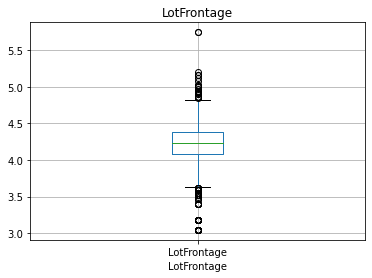

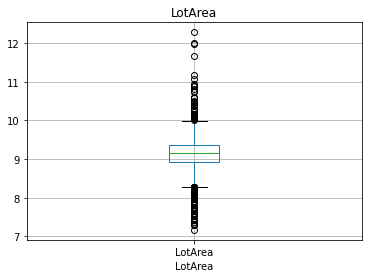

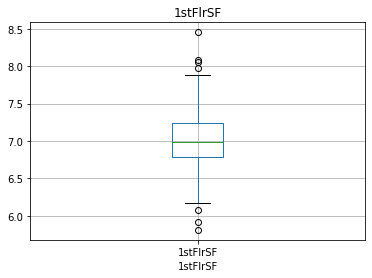

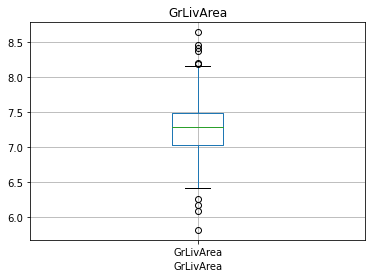

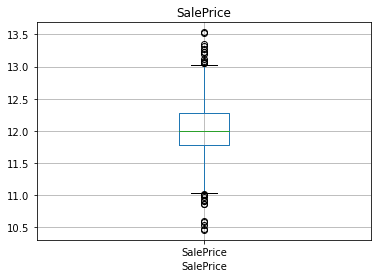

In [54]:
for feature in continuous_features:
    data = dataset.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature] = np.log(data[feature])
        data.boxplot(column = feature)
        plt.xlabel(feature)
        plt.title(feature)
        plt.show()

We can see all of them have outliers which need to be removed

### Categorial Features

In [56]:
categorical_features = [feature for feature in dataset.columns if dataset[feature].dtypes=='O']
print("Number of categorical features :", len(categorical_features))

Number of categorical features : 43


In [57]:
for feature in categorical_features:
    print('{} feature has {} unique categorical values'.format(feature, len(dataset[feature].unique())))

MSZoning feature has 5 unique categorical values
Street feature has 2 unique categorical values
Alley feature has 3 unique categorical values
LotShape feature has 4 unique categorical values
LandContour feature has 4 unique categorical values
Utilities feature has 2 unique categorical values
LotConfig feature has 5 unique categorical values
LandSlope feature has 3 unique categorical values
Neighborhood feature has 25 unique categorical values
Condition1 feature has 9 unique categorical values
Condition2 feature has 8 unique categorical values
BldgType feature has 5 unique categorical values
HouseStyle feature has 8 unique categorical values
RoofStyle feature has 6 unique categorical values
RoofMatl feature has 8 unique categorical values
Exterior1st feature has 15 unique categorical values
Exterior2nd feature has 16 unique categorical values
MasVnrType feature has 5 unique categorical values
ExterQual feature has 4 unique categorical values
ExterCond feature has 5 unique categorical va

Categorical variables with upto 7 unique values can be handled by OnehotEncoding but rest need to handled other way

In [58]:
# Let's check their relation with Sale Price

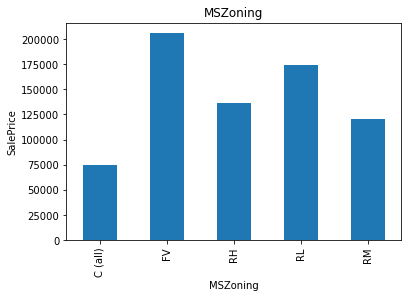

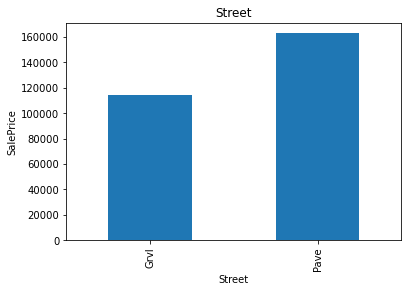

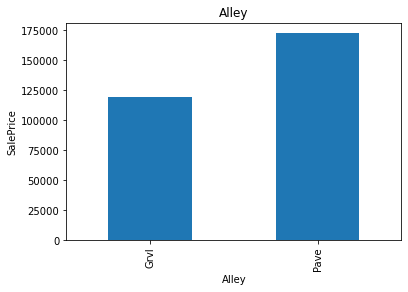

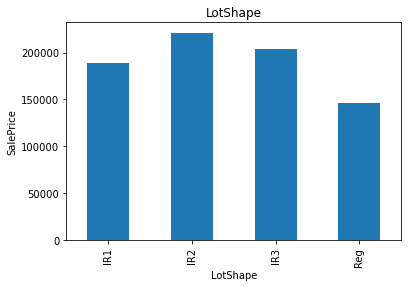

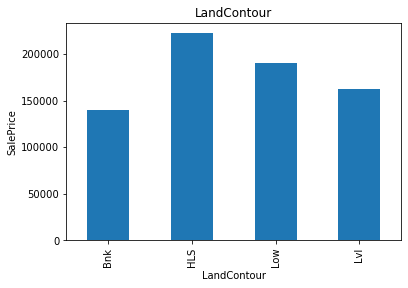

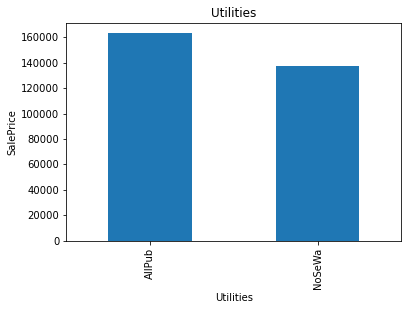

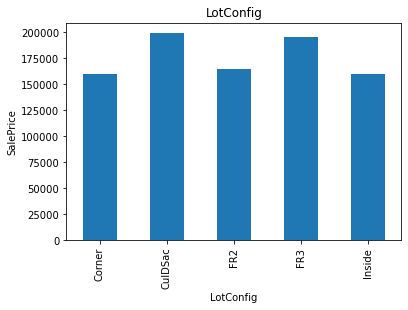

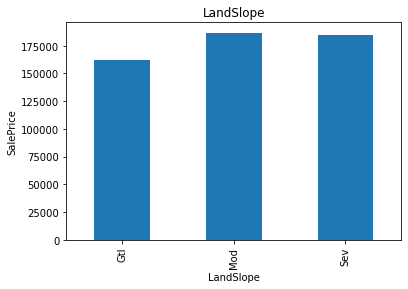

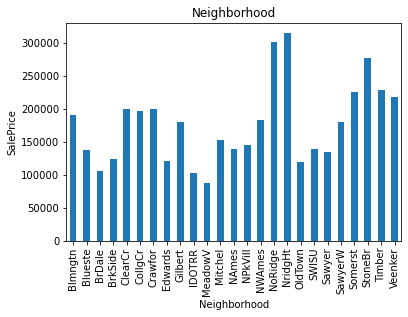

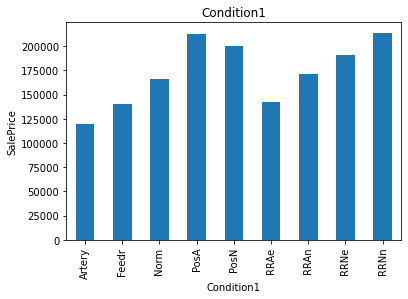

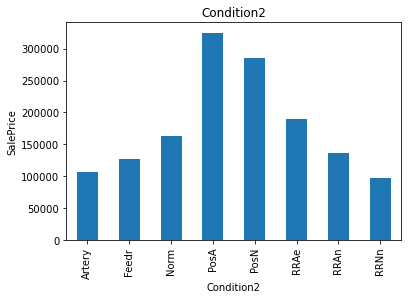

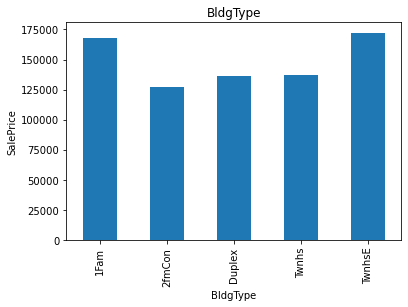

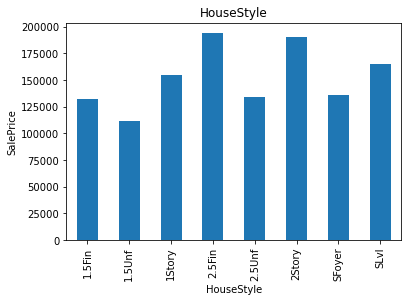

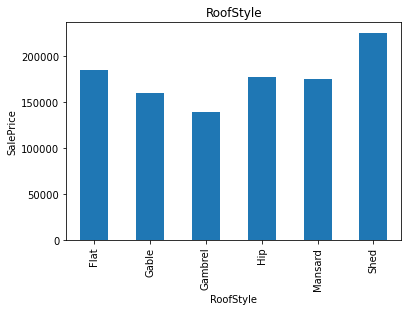

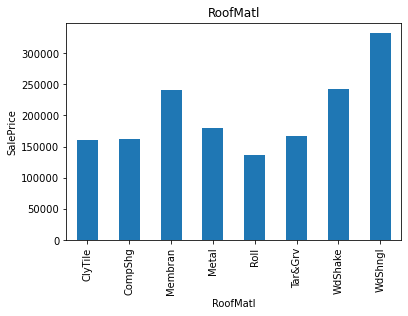

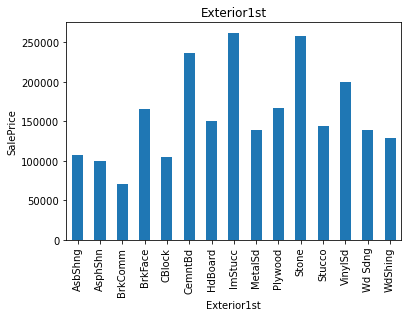

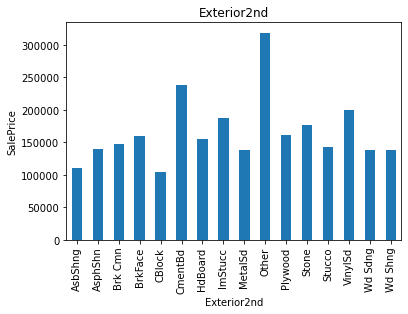

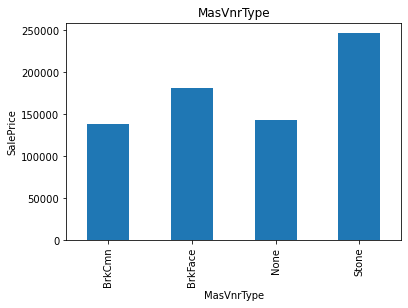

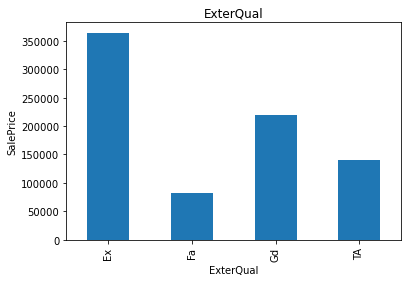

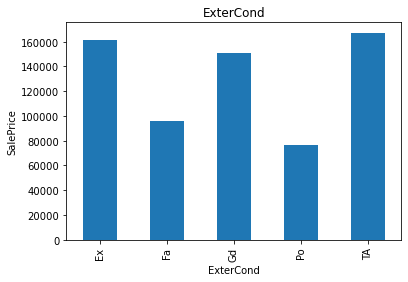

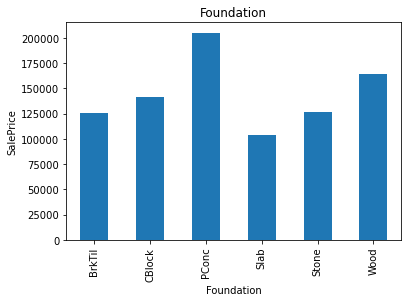

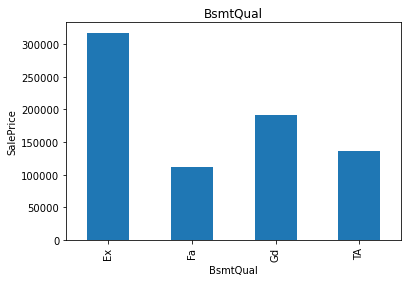

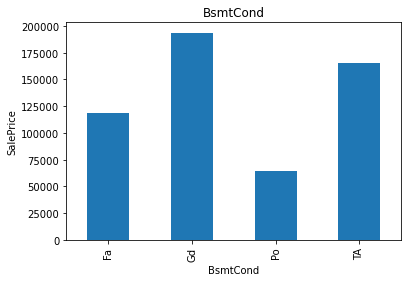

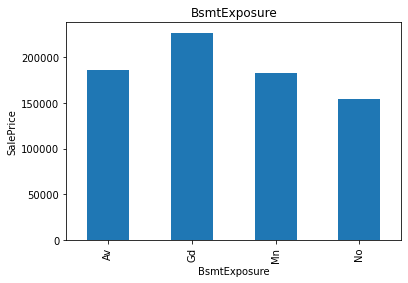

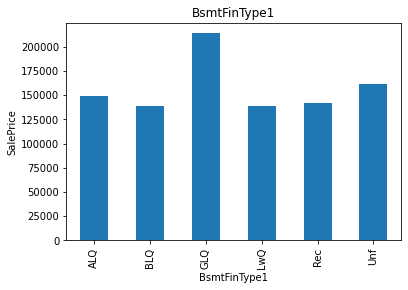

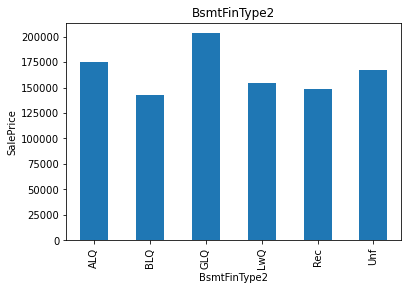

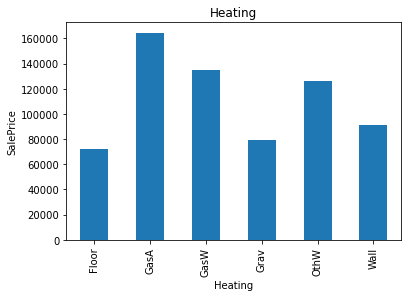

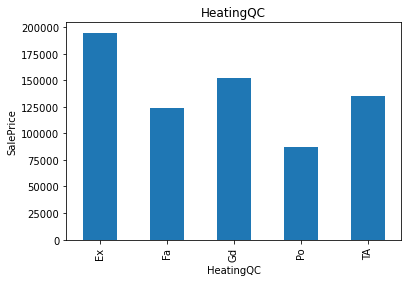

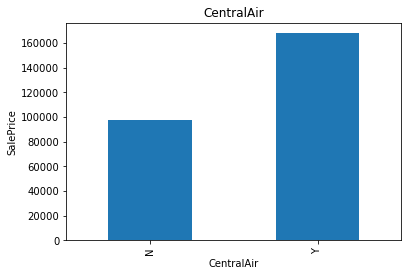

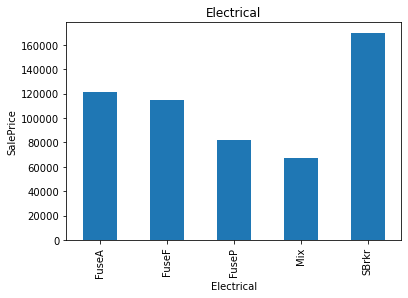

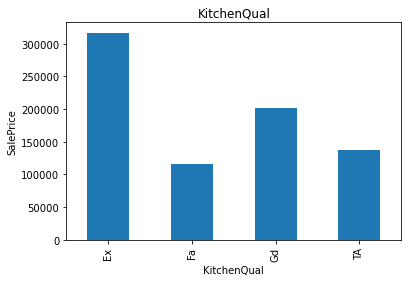

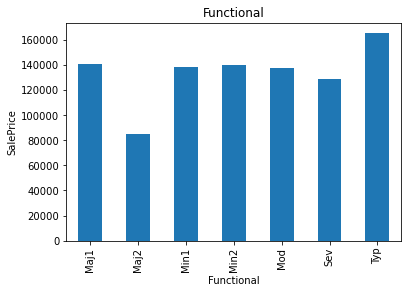

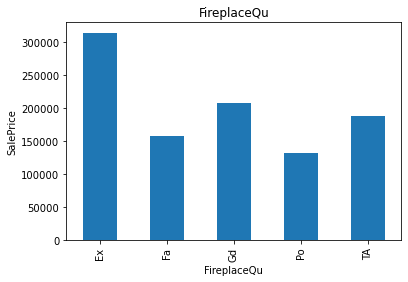

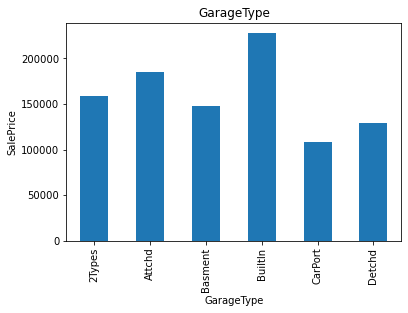

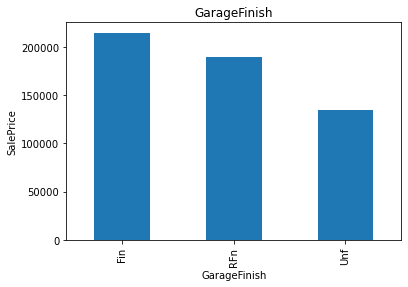

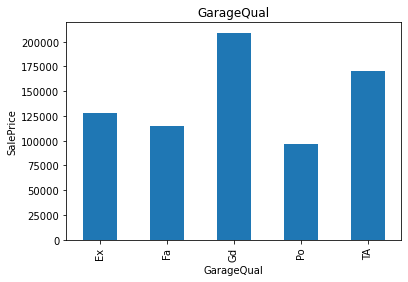

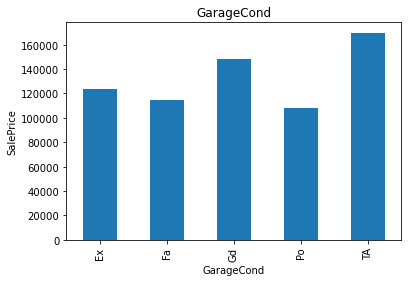

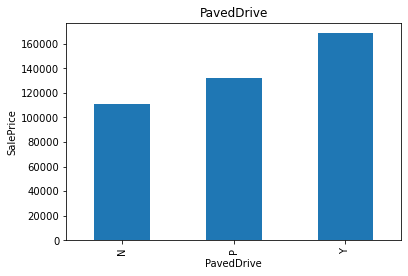

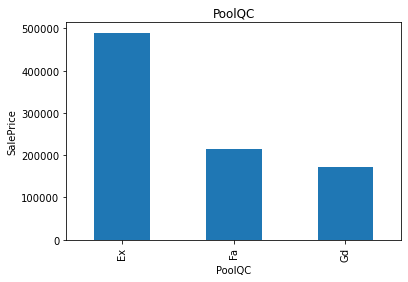

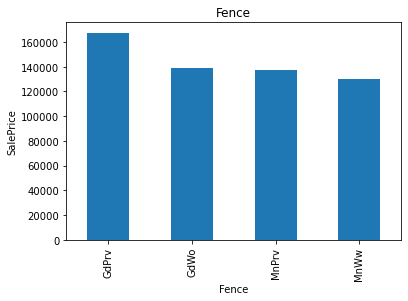

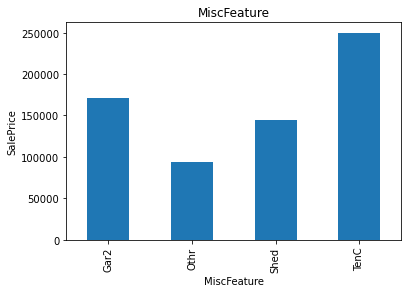

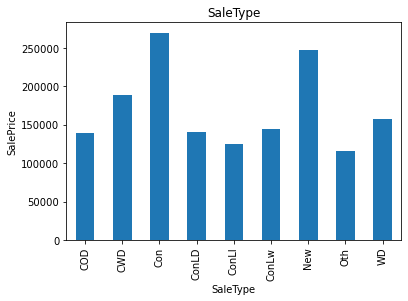

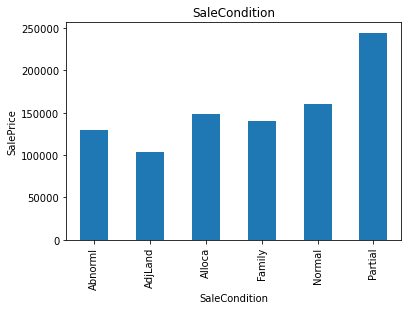

In [59]:
for feature in categorical_features:
    data = dataset.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data.groupby(feature)['SalePrice'].median().plot.bar()
        plt.xlabel(feature)
        plt.ylabel('SalePrice')
        plt.title(feature)
        plt.show()